# 💥 **Cracking Fraud with XGBoost 🚀 (99.9% ROC-AUC 🎯)**


## **About the Dataset(Metadata)**:
- Here Is the dataset overview:

| 🏷️ Column Name         | 📄 Description                               | 💡 Purpose / Role in Fraud Detection            |
| ----------------------- | -------------------------------------------- | ----------------------------------------------- |
| `trans_date_trans_time` | Date and time of the transaction             | Helps analyze time-based fraud patterns         |
| `cc_num`                | Credit card number (anonymized)              | Identifies unique cardholders                   |
| `merchant`              | Merchant or business name                    | Detects merchants linked to suspicious activity |
| `category`              | Type of transaction (e.g., shopping, travel) | Useful for behavioral segmentation              |
| `amt`                   | Transaction amount                           | High or unusual values may indicate fraud       |
| `first`                 | Cardholder’s first name                      | Identification (non-predictive)                 |
| `last`                  | Cardholder’s last name                       | Identification (non-predictive)                 |
| `gender`                | Gender of cardholder (0 = Female, 1 = Male)  | Behavioral analysis (optional feature)          |
| `street`                | Street address of the user                   | Helps detect geographical mismatches            |
| `city`                  | City of the user                             | Used for location-based fraud insights          |
| `state`                 | State of the user                            | Regional trend analysis                         |
| `zip`                   | ZIP or postal code                           | Region grouping for risk detection              |
| `lat`                   | Latitude of the transaction                  | Used to detect abnormal geo-locations           |
| `long`                  | Longitude of the transaction                 | Combined with latitude for fraud patterns       |
| `city_pop`              | Population of the user’s city                | Socioeconomic risk indicator                    |
| `job`                   | Occupation of the cardholder                 | Can reflect spending behavior and risk          |
| `dob`                   | Date of birth                                | Used to calculate age-related trends            |
| `trans_num`             | Unique transaction ID                        | Identifies each transaction record              |
| `unix_time`             | Transaction timestamp (in Unix format)       | Temporal analysis for fraud trends              |
| `merch_lat`             | Latitude of the merchant                     | Helps find distance-based frauds                |
| `merch_long`            | Longitude of the merchant                    | Cross-checks merchant and user location         |
| `is_fraud`              | 🚨 Target variable (1 = Fraud, 0 = Legit)    | The main column to predict                      |



## **Aims & Objectives**

### **Aim**

To build a powerful and efficient fraud detection system using Machine Learning algorithms, capable of accurately identifying fraudulent credit card transactions while minimizing false alarms.

---

### **Objectives**

1. **Data Understanding & Cleaning** – Explore and preprocess the dataset by handling missing values, encoding categorical columns, and scaling numerical features.
2. **Class Imbalance Handling** – Apply SMOTE to balance legitimate and fraudulent transactions for fair model training.
3. **Feature Analysis** – Investigate important patterns in transaction amount, location, and time to uncover fraud-related behaviors.
4. **Model Development** – Train and evaluate multiple ML models including Logistic Regression, Random Forest, Gradient Boosting, LightGBM, and XGBoost.
5. **Model Comparison** – Compare models using key metrics such as Accuracy, ROC-AUC, Precision, and Recall.
6. **Best Model Selection** – Select the most reliable model (XGBoost) achieving 99.9% ROC-AUC, ensuring strong fraud detection capability.
7. **Performance Validation** – Use Cross-Validation to confirm model consistency and prevent overfitting.
8. **Prediction & Insights** – Predict potential fraudulent transactions and interpret results to support secure financial operations.



## Step 1: Import libraries

- Let's import those libraries which are required for our analysis.

In [3]:
!pip install -U scikit-learn==1.5.2 imbalanced-learn==0.12.3 --quiet


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from math import radians, sin, cos, sqrt, atan2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

## Step 2: Load The Dataset.

In [6]:
df = pd.read_csv('/content/fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


## Step 3: Understand our dataset.

In [7]:
df.shape

(895089, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895089 entries, 0 to 895088
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             895089 non-null  int64  
 1   trans_date_trans_time  895089 non-null  object 
 2   cc_num                 895089 non-null  int64  
 3   merchant               895089 non-null  object 
 4   category               895089 non-null  object 
 5   amt                    895089 non-null  float64
 6   first                  895089 non-null  object 
 7   last                   895088 non-null  object 
 8   gender                 895088 non-null  object 
 9   street                 895088 non-null  object 
 10  city                   895088 non-null  object 
 11  state                  895088 non-null  object 
 12  zip                    895088 non-null  float64
 13  lat                    895088 non-null  float64
 14  long                   895088 non-nu

In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,1
gender,1
street,1


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,895089.0,4.475440e+05,2.583901e+05,0.000000e+00,2.237720e+05,4.475440e+05,6.713160e+05,8.950880e+05
cc_num,895089.0,4.167009e+17,1.308244e+18,6.041621e+10,1.800400e+14,3.520550e+15,4.642255e+15,4.992346e+18
amt,895089.0,7.027357e+01,1.622084e+02,1.000000e+00,9.640000e+00,4.741000e+01,8.305000e+01,2.894890e+04
zip,895088.0,4.879188e+04,2.690356e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.201100e+04,9.978300e+04
lat,895088.0,3.853387e+01,5.075635e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.189480e+01,6.669330e+01
long,895088.0,-9.022311e+01,1.376496e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,895088.0,8.913355e+04,3.026086e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.047800e+04,2.906700e+06
unix_time,895088.0,1.342411e+09,8.862448e+06,1.325376e+09,1.335134e+09,1.342595e+09,1.350126e+09,1.356446e+09
merch_lat,895088.0,3.853374e+01,5.109913e+00,1.902779e+01,3.473519e+01,3.936366e+01,4.195293e+01,6.751027e+01
merch_long,895088.0,-9.022327e+01,1.377701e+01,-1.666712e+02,-9.689842e+01,-8.743250e+01,-8.022674e+01,-6.695654e+01


In [11]:
df.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [12]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## Step 4: Data Preprocessing

- Let's Drop Unnecessary Columns.

In [13]:
df = df.drop(columns=['first', 'last', 'street', 'trans_num', 'cc_num']
)

In [14]:
df.head()

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,1.325376e+09,38.674999,-78.632459,0.0


- Now we will convert `trans_date_trans_time` column into datetime format.

In [20]:

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Saturday/Sunday = 1

df.drop('trans_date_trans_time', axis=1, inplace=True)

df.head()


KeyError: 'trans_date_trans_time'

- Let's encode the Merchant Category column using Label Encoding.

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['merchant'] = le.fit_transform(df['merchant'])

In [17]:
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,day_of_week,is_weekend
0,0,514,misc_net,4.97,F,Moravian Falls,NC,28654.0,36.0788,-81.1781,...,1.325376e+09,36.011293,-82.048315,0.0,2019,1,1,0,1,0
1,1,241,grocery_pos,107.23,F,Orient,WA,99160.0,48.8878,-118.2105,...,1.325376e+09,49.159047,-118.186462,0.0,2019,1,1,0,1,0
2,2,390,entertainment,220.11,M,Malad City,ID,83252.0,42.1808,-112.2620,...,1.325376e+09,43.150704,-112.154481,0.0,2019,1,1,0,1,0
3,3,360,gas_transport,45.00,M,Boulder,MT,59632.0,46.2306,-112.1138,...,1.325376e+09,47.034331,-112.561071,0.0,2019,1,1,0,1,0
4,4,297,misc_pos,41.96,M,Doe Hill,VA,24433.0,38.4207,-79.4629,...,1.325376e+09,38.674999,-78.632459,0.0,2019,1,1,0,1,0


In [18]:
df['merchant'].value_counts()

,count
merchant,
316,3008
105,2568
571,2491
70,2405
349,2380
...,...
423,528
261,527
339,525


- Let's we make the the combo of the `merchent` and `category` column.

In [19]:
df['merchant_category_combo'] = df['merchant'].astype(str) + '_' + df['category'].astype(str)


- Now we calculates the distance (in kilometers) between the customer’s location and the merchant’s location using the **Haversine formula** and adds it as a new column called **`distance_km`** in the dataset.


In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

df['distance_km'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


In [21]:
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo
0,0,514,misc_net,4.97,F,Moravian Falls,NC,28654.0,36.0788,-81.1781,...,36.011293,-82.048315,0.0,2019,1,1,0,1,0,514_misc_net
1,1,241,grocery_pos,107.23,F,Orient,WA,99160.0,48.8878,-118.2105,...,49.159047,-118.186462,0.0,2019,1,1,0,1,0,241_grocery_pos
2,2,390,entertainment,220.11,M,Malad City,ID,83252.0,42.1808,-112.2620,...,43.150704,-112.154481,0.0,2019,1,1,0,1,0,390_entertainment
3,3,360,gas_transport,45.00,M,Boulder,MT,59632.0,46.2306,-112.1138,...,47.034331,-112.561071,0.0,2019,1,1,0,1,0,360_gas_transport
4,4,297,misc_pos,41.96,M,Doe Hill,VA,24433.0,38.4207,-79.4629,...,38.674999,-78.632459,0.0,2019,1,1,0,1,0,297_misc_pos


- Let's encode the `category` column using Label Encoding.

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])


In [23]:
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo
0,0,514,8,4.97,F,Moravian Falls,NC,28654.0,36.0788,-81.1781,...,36.011293,-82.048315,0.0,2019,1,1,0,1,0,514_misc_net
1,1,241,4,107.23,F,Orient,WA,99160.0,48.8878,-118.2105,...,49.159047,-118.186462,0.0,2019,1,1,0,1,0,241_grocery_pos
2,2,390,0,220.11,M,Malad City,ID,83252.0,42.1808,-112.2620,...,43.150704,-112.154481,0.0,2019,1,1,0,1,0,390_entertainment
3,3,360,2,45.00,M,Boulder,MT,59632.0,46.2306,-112.1138,...,47.034331,-112.561071,0.0,2019,1,1,0,1,0,360_gas_transport
4,4,297,9,41.96,M,Doe Hill,VA,24433.0,38.4207,-79.4629,...,38.674999,-78.632459,0.0,2019,1,1,0,1,0,297_misc_pos


In [25]:
zip_fraud_rate = df.groupby('zip')['is_fraud'].mean().reset_index()
zip_fraud_rate


,zip,is_fraud
0,1257.0,0.000000
1,1330.0,0.012570
2,1535.0,0.026163
3,1545.0,0.000000
4,1612.0,0.023936
...,...,...
941,99160.0,0.000000
942,99323.0,0.000000
943,99746.0,0.000000
944,99747.0,1.000000


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['zip_encoded'] = le.fit_transform(df['zip'])


In [27]:
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,merch_long,is_fraud,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo,zip_encoded
0,0,514,8,4.97,F,Moravian Falls,NC,28654.0,36.0788,-81.1781,...,-82.048315,0.0,2019,1,1,0,1,0,514_misc_net,261
1,1,241,4,107.23,F,Orient,WA,99160.0,48.8878,-118.2105,...,-118.186462,0.0,2019,1,1,0,1,0,241_grocery_pos,941
2,2,390,0,220.11,M,Malad City,ID,83252.0,42.1808,-112.2620,...,-112.154481,0.0,2019,1,1,0,1,0,390_entertainment,837
3,3,360,2,45.00,M,Boulder,MT,59632.0,46.2306,-112.1138,...,-112.561071,0.0,2019,1,1,0,1,0,360_gas_transport,598
4,4,297,9,41.96,M,Doe Hill,VA,24433.0,38.4207,-79.4629,...,-78.632459,0.0,2019,1,1,0,1,0,297_misc_pos,228


In [28]:
df.drop(columns=['zip'], inplace=True)

In [29]:
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,lat,long,city_pop,...,merch_long,is_fraud,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo,zip_encoded
0,0,514,8,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495.0,...,-82.048315,0.0,2019,1,1,0,1,0,514_misc_net,261
1,1,241,4,107.23,F,Orient,WA,48.8878,-118.2105,149.0,...,-118.186462,0.0,2019,1,1,0,1,0,241_grocery_pos,941
2,2,390,0,220.11,M,Malad City,ID,42.1808,-112.2620,4154.0,...,-112.154481,0.0,2019,1,1,0,1,0,390_entertainment,837
3,3,360,2,45.00,M,Boulder,MT,46.2306,-112.1138,1939.0,...,-112.561071,0.0,2019,1,1,0,1,0,360_gas_transport,598
4,4,297,9,41.96,M,Doe Hill,VA,38.4207,-79.4629,99.0,...,-78.632459,0.0,2019,1,1,0,1,0,297_misc_pos,228


In [30]:
import numpy as np

df['amt'] = np.log1p(df['amt'])  # log1p = log(x+1)


<Axes: xlabel='amt', ylabel='Count'>

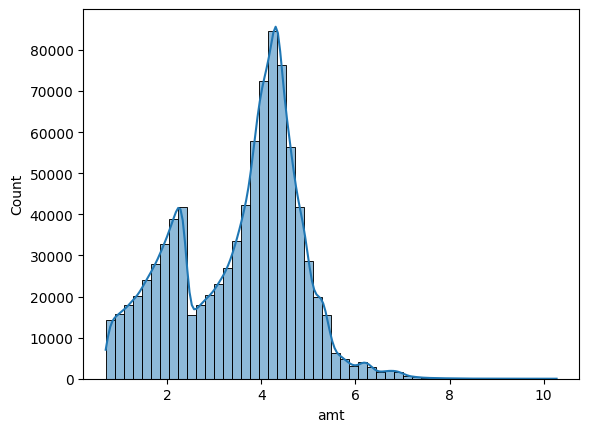

In [31]:
sns.histplot(df['amt'], kde=True, bins=50)

<Axes: xlabel='is_fraud', ylabel='count'>

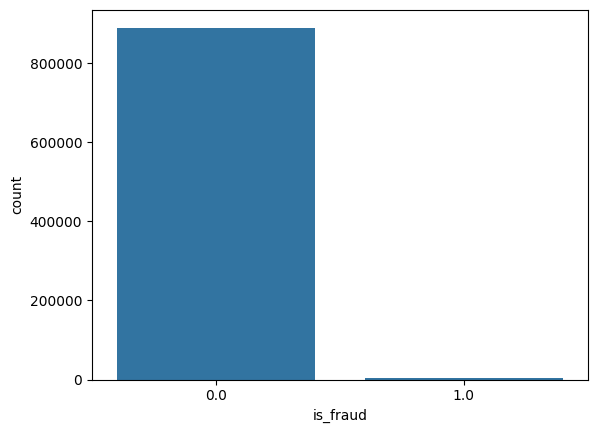

In [32]:
sns.countplot(x='is_fraud', data=df)

- Now we will encode all the categorical columns using Label Encoding.

In [33]:
df.select_dtypes(include=['object']).columns


Index(['gender', 'city', 'state', 'job', 'dob', 'merchant_category_combo'], dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


Now we splits the dataset into features (**X**) and target (**y**), then divides it into training and testing sets while keeping class balance using **stratify**.
After that, it applies **SMOTE** only on the training data to handle class imbalance by slightly increasing the number of fraud cases (making them about 10% of non-fraud cases).


In [36]:
# Step 1: Split X and y
# Drop rows where 'is_fraud' is NaN to ensure clean target variable
df.dropna(subset=['is_fraud'], inplace=True)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Step 2: Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Step 3: Handle imbalance using SMOTE.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.1)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.value_counts().to_dict())
print("After SMOTE:", X_train_res.shape, y_train_res.value_counts().to_dict())

Before SMOTE: (716070, 23) {0.0: 712010, 1.0: 4060}
After SMOTE: (783211, 23) {0.0: 712010, 1.0: 71201}


In [37]:
import pandas as pd

df_resampled = pd.concat(
    [pd.DataFrame(X_train_res, columns=X.columns),
     pd.Series(y_train_res, name='is_fraud')],
    axis=1
)


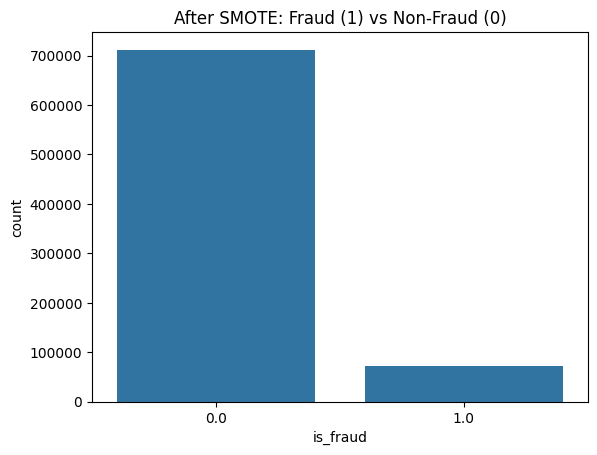

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_fraud', data=df_resampled)
plt.title("After SMOTE: Fraud (1) vs Non-Fraud (0)")
plt.show()


In [40]:
print(df['lat'].min(), df['lat'].max())
print(df['long'].min(), df['long'].max())


20.0271 66.6933
-165.6723 -67.9503


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['unix_time'] = scaler.fit_transform(df[['unix_time']])

<Axes: xlabel='unix_time', ylabel='Count'>

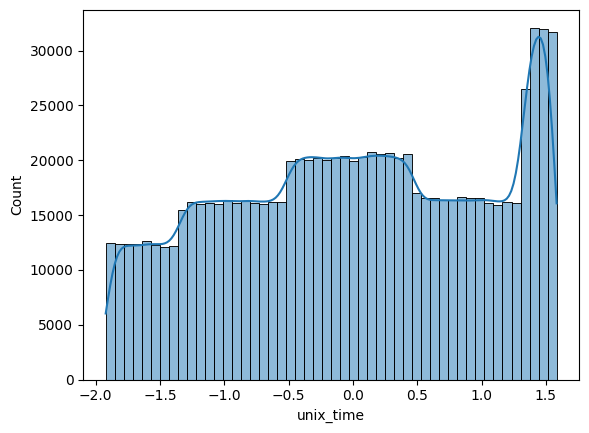

In [42]:
sns.histplot(df['unix_time'], bins=50, kde=True)

## Step 5: Model Building and Evaluation

In [44]:

import pandas as pd
import numpy as np


X = df.drop(columns=['is_fraud'])
y = df['is_fraud']


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale Features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Fast & Powerful Models Only

models = {
    "Logistic Regression": LogisticRegression(max_iter=300, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=200, max_depth=6, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        n_jobs=-1, eval_metric='logloss'
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200, learning_rate=0.1, num_leaves=31,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        n_jobs=-1
    ),
}


# Train + Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC_AUC": roc
    })

    print(f"\n================= {name} =================")
    print(f" Accuracy: {acc:.4f} |  ROC-AUC: {roc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Compare Results
#
results_df = pd.DataFrame(results).sort_values(by="ROC_AUC", ascending=False).reset_index(drop=True)
print("\n\n Model Comparison:")
print(results_df)

best_model = results_df.iloc[0]
print(f"\n Best Model: {best_model['Model']} | ROC-AUC: {best_model['ROC_AUC']:.4f}")



================= Logistic Regression =================
 Accuracy: 0.9941 |  ROC-AUC: 0.8399
Confusion Matrix:
 [[177953     50]
 [  1015      0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    178003
         1.0       0.00      0.00      0.00      1015

    accuracy                           0.99    179018
   macro avg       0.50      0.50      0.50    179018
weighted avg       0.99      0.99      0.99    179018


================= Random Forest =================
 Accuracy: 0.9977 |  ROC-AUC: 0.9936
Confusion Matrix:
 [[177991     12]
 [   395    620]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    178003
         1.0       0.98      0.61      0.75      1015

    accuracy                           1.00    179018
   macro avg       0.99      0.81      0.88    179018
weighted avg       1.00      1.00      1.00    179018


=======

- Here we get very good ROC-AUC score of 99.9% using XGBoost model.

- Now we check the cross-validation score to ensure the model is not overfitting.

In [45]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

xgb = models['XGBoost']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring='roc_auc')

print("Cross-validation ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())


Cross-validation ROC-AUC scores: [0.99897034 0.99868714 0.9983272  0.99892092 0.99893455]
Mean ROC-AUC: 0.9987680309811887


## Step 6: Save the model

In [46]:
import joblib

# Save model
joblib.dump(models['XGBoost'], "best_xgboost_model.pkl")

# Load model when needed
model = joblib.load("best_xgboost_model.pkl")

# Predict new data
y_pred_new = model.predict(89)
print(y_pred_new)


[0]
